In [3]:
import matplotlib
from IPython import get_ipython
ipy = get_ipython()
if ipy is not None:
    ipy.run_line_magic('matplotlib', 'inline')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import re
import io
from numpy import array
import pandas as pd
import numpy as np
#from wordcloud import WordCloud
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_recall_fscore_support
from sklearn.svm import SVC
import multiprocessing
from multiprocessing import Pool
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import gensim
import keras.backend as K
import nltk
from nltk.corpus import stopwords
#import scikitplot.plotters as skplt
from xgboost import XGBClassifier
import os
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Activation, LeakyReLU, PReLU, ELU, ThresholdedReLU
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.optimizers import Adam
from keras.constraints import unit_norm
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from keras.constraints import maxnorm
from sklearn.svm import LinearSVC,SVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelBinarizer
from scipy import interp
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.base import clone
from sklearn.preprocessing import label_binarize
from sklearn import metrics
from keras import models
from keras import layers
from keras import regularizers
from gensim.models import FastText
from keras.layers import Dense, Input, LSTM, GRU, Conv1D, MaxPooling1D, Dropout, Concatenate, Conv2D, MaxPooling2D, concatenate,BatchNormalization, Bidirectional
from keras.initializers import glorot_uniform
from gensim.models.keyedvectors import KeyedVectors
from keras.layers.core import Reshape, Flatten
from keras.callbacks import EarlyStopping
from keras.activations import relu
from keras.optimizers import SGD
from sklearn.exceptions import DataConversionWarning
from sklearn.feature_extraction.text import TfidfTransformer
import seaborn as sns
from operator import is_not
from functools import partial
from gensim.models.wrappers import FastText
import matplotlib.patches as patches
import time
import datetime
#import fastText
from gensim.models import word2vec
import warnings
import pickle
from sklearn.manifold import TSNE
from collections import Counter
import string
import operator 
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore')

num_partitions = multiprocessing.cpu_count()
num_cores = multiprocessing.cpu_count()
#Global Variables from [7] and others
NB_WORDS = 4037069  # Parameter indicating the number of words we'll put in the dictionary 

VAL_SIZE = 9  # Size of the validation set (originally 1000)
NB_START_EPOCHS = 8  # Number of epochs we usually start to train with
BATCH_SIZE = 512  # Size of the batches used in the mini-batch gradient descent
MAX_LEN = 134  # Maximum number of words in a sequence
#MAX_LEN = 62
GLOVE_DIM = 50  # Number of dimensions of the GloVe word embeddings
MAX_SEQUENCE_LENGTH = 860
MAX_NB_WORDS = 4037069
EMBEDDING_DIM = 100
VALIDATION_SPLIT = 0.1
#activation function
act = 'relu'
re_weight = True
#dimension for fasttext
DIM = 300
#dimension for word2vec
embed_dim = 256
lstm_out = 196
dim = 50
filter_sizes = [3,4,5]
num_filters = 100
drop = 0.5
maxLen = 60
kernel_size = 5
filters = 64
pool_size = 4
lstm_output_size = 70
#model2 = fastText.train_supervised('./fasttext_train.txt',label='label_', epoch=20, dim=200)

def cleaning(s):
    s = str(s)
    s = s.lower()
    s = re.sub(r'\s\W',' ',s)
    s = re.sub(r'\W,\s',' ',s)
    s = re.sub(r'[^\w]', ' ', s)
    s = re.sub(r"\d+", "", s)
    s = re.sub(r'\s+',' ',s)
    s = re.sub(r'[!@#$_]', '', s)
    s = s.replace("co","")
    s = s.replace("https","")
    s = s.replace(",","")
    s = s.replace("[\w*"," ")
    
    return s
def clean_text(txt):
    txt = "".join(v for v in txt if v not in string.punctuation).lower()
    txt = txt.encode("utf8").decode('utf8', 'ignore')
    return txt

def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    data['FreeText'] = [cleaning(s) for s in data['FreeText']]
    corpus = []
    for col in ['FreeText']:
        for sentence in data[col].iteritems():
            word_list = sentence[1].split(" ")
            corpus.append(word_list)
    
    with open('corpus.pickle', 'wb') as handle:
        pickle.dump(corpus, handle, protocol=pickle.HIGHEST_PROTOCOL)
    return corpus
def tsne_plot(df):
    corpus = build_corpus(df)
    
    model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=1, workers=4)
    with open('w2vmodel.pickle', 'wb') as handle:
        pickle.dump(model, handle, protocol=pickle.HIGHEST_PROTOCOL)
    #model.most_similar('')
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

def transformAge(df):
    '''
    This function will categorise the age data into 5 different age categories
    '''
    dfage = df.Age

    array = []
    for i in range(len(dfage)):
        if dfage[i] < 3:
            array.append(0)
        elif dfage[i] >= 3 and dfage[i] < 13:
            array.append(1)
        elif dfage[i] >= 13 and dfage[i] < 19:
            array.append(2)
        elif dfage[i] >= 19 and dfage[i] < 65:
            array.append(3)
        else:
            array.append(4)
    df["AgeCat"] = array
    return df

def transformLCD(df):
    '''
    This function will transform the numerical LCD data into 3 categories
    '''
    dflcd = df.LastContactDays
    array = []
    for i in range(len(dflcd)):
        if dflcd[i] < 2:
            array.append(0)
        elif dflcd[i] >= 2 and dflcd[i] < 31:
            array.append(1)
        else:
            array.append(2)
    df["LcdCat"] = array
    return df

def test_code(input):
    print("Hello " + input)

def eda1(df):
    figsize=(20, 10)
    
    ticksize = 14
    titlesize = ticksize + 8
    labelsize = ticksize + 5

    params = {'figure.figsize' : figsize,
            'axes.labelsize' : labelsize,
            'axes.titlesize' : titlesize,
            'xtick.labelsize': ticksize,
            'ytick.labelsize': ticksize}

    plt.rcParams.update(params)
    
    plt.subplot(441)
    x1=df['prio']
    ylabel = "Count"
    sns.countplot(x1)
    plt.xticks(rotation=90)
    plt.title('Priority')
    plt.xlabel('')
    plt.ylabel(ylabel)


    plt.subplot(442)
    x2=df['operator']
    ylabel = "Count"
    sns.countplot(x2)
   # plt.title("Review Sentiment Count")
    plt.title('Operator')
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(rotation=90)
    plt.plot()
    
    #pout
    plt.subplot(443)
    x3=df['pout']
    ylabel = "Count"
    sns.countplot(x3)
    plt.title('Pout')
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(rotation=90)

    plt.subplot(444)
    x4=df['hosp_ed']
    ylabel = "Count"
    sns.countplot(x4)
    plt.title('Hospitaled')
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(rotation=90)

    plt.subplot(449)
    x4=df['AgeCat']
    ylabel = "Count"
    sns.countplot(x4)
    plt.title('Age')
    plt.xlabel('')
    plt.ylabel(ylabel)
    plt.xticks(rotation=90)

    plt.subplot(4,4,10)
    x4=df['Gender']
    ylabel = "Count"
    sns.countplot(x4)
    plt.title('Gender')
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(rotation=90)

    plt.subplot(4,4,11)
    x4=df['LastContactN']
    ylabel = "Count"
    sns.countplot(x4)
    plt.title('LastContactN')
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(rotation=90)

    plt.subplot(4,4,12)
    x4=df['LcdCat']
    ylabel = "Count"
    sns.countplot(x4)
    plt.title('LastContactDays')
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(rotation=90)

    plt.plot()
    plt.show()
def eda2(df):
    #max number of words in a sentence
    df1 = pd.DataFrame(df)
    df1['FreeText_count'] = df['freetext'].astype(str).apply(lambda x: Counter(x.split(' ')))
    LEN = df1['FreeText_count'].apply(lambda x : sum(x.values()))
    max_LEN = max(LEN)
    global MAX_LEN
    MAX_LEN = max_LEN
    print("MAX_LEN is:")
    print(max_LEN)
    #length of sequence
    df["FreeText_len"] = df["freetext"].astype(str).apply(lambda x: len(x))
    #maximum number of sequence length
    #print(df["FreeText_len"].max())
    df["FreeText_len"].hist(figsize = (15, 10), bins = 100)
    plt.show()
    global MAX_SEQUENCE_LENGTH
    MAX_SEQUENCE_LENGTH = df["FreeText_len"].max()
    print("MAX_SEQUENCE_LENGTH is:")
    print(MAX_SEQUENCE_LENGTH)
    global NB_WORDS
    NB_WORDS = df['FreeText_len'].sum()
    print("NB_WORDS is:")
    print(NB_WORDS)
    #word EDA
    dummies2 = df.iloc[:,1:2]
    #tsne_plot(dummies2)
    #wordcloud
    df['FreeText'] = [cleaning(s) for s in df['freetext'].astype(str)]
    #input_data = df['freetext']
    #word_cloud(input_data)
    #with open('corpus.pickle', 'rb') as handle:
        #corpus = pickle.load(handle)
    #xt = np.concatenate(corpus)
    #plt.figure(figsize=(20,10))
    #pd.value_counts(xt).plot(kind="barh")
    #plt.show()
    
def word_cloud(input_data,title=None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(input_data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
#preprocessing function. use the dummies as input
def pre_processing1(input,df):
    sentence = [None] * df.shape[0]
    for i in range(len(sentence)):
        old_sentence = input.iloc[i]
        word = list(old_sentence.split())
        words = [None] * len(word)
        for i in range(len(word)):
            words[i] = re.sub(r'\W+', '', word[i].lower())
        words1 = [x for x in words if x is not None]
        sentence.append(' '.join(words1))
        sentence1 = [x for x in sentence if x is not None]
    values = array(sentence1)
    return values

#this methods is courtesy from [1], it is an alternative preprocessing method that also uses stop words removal and normalization (in the main section)
def pre_processing2(input):
    #np.vectorize(input)
    dummies1=re.sub(r"\w+", " ", input)
    pattern = r"[{}]".format(",.;")
    dummies1=re.sub(pattern, "", input)
    #lower casing
    dummies1= dummies1.lower()
    dummies1 = dummies1.strip()
    WPT = nltk.WordPunctTokenizer()
    #tokenization
    tokens = WPT.tokenize(dummies1)
    #stop words removal
    stop_word_list = nltk.corpus.stopwords.words('swedish')
    filtered_tokens = [token for token in tokens if token not in stop_word_list]
    result = ' '.join(filtered_tokens)
    return result

#this function is used to transform string data into float data: e.g. Pout (String) to NewPout (float) using a scoring method where the highest value is the highest priority
def transform_output_data(output_dataframe,datatype=None):
    
    #alternative 1
    data2 = [None] * output_dataframe.shape[0]
    data = output_dataframe
    #float datatype by default
    if datatype is None:
        for i in range(len(data2)):
            if data[i] == '1A':
                data2.append(1.0)
            elif data[i] == '1B':
                data2.append(0.8)
            elif data[i] == '2A':
                data2.append(0.6)
            elif data[i] == '2B':
                data2.append(0.4)
            else:
                data2.append(0.2)
            data1 = [x for x in data2 if x is not None]
        data2 = np.array(data1)
        df_data = pd.DataFrame({'NewPout': data2})
        return df_data
    elif datatype == 'int':
        for i in range(len(data)):
            if data[i] == '1A':
                data2.append(1)
            elif data[i] == '1B':
                data2.append(2)
            elif data[i] == '2A':
                data2.append(3)
            elif data[i] == '2B':
                data2.append(4)
            else:
                data2.append(5)
            data1 = [x for x in data2 if x is not None]
        data2 = np.array(data1)
        df_data = pd.DataFrame({'NewPout': data2})
        return df_data
    elif datatype == 'multi':
        label_encoder = LabelEncoder()
        label_encoder = label_encoder.fit(output_dataframe)
        label_encoded_y = label_encoder.transform(output_dataframe)
        df_data = pd.DataFrame({'NewPout': label_encoded_y})
        return df_data
    #note to self: don't binarize the outputs, if there is binary outputs: use BoW for the binary outputs
def inverse_transform_output_data(input):
    data2 = [None] * input.shape[0]
    data = input
    for i in range(len(data2)):
        if data[i] == 1.0 or data[i] == 1:
            data2.append("1A")
        elif data[i] == 0.8 or data[i] == 2:
            data2.append("1B")
        elif data[i] == 0.6 or data[i] == 3:
            data2.append("2A")
        elif data[i] == 0.4 or data[i] == 4:
            data2.append("2B")
        else:
            data2.append("Referral")
            data1 = [x for x in data2 if x is not None]
    data2 = np.array(data1)
    df_data = pd.DataFrame({'NewPout': data2})
    return df_data
def text_processing(input_data, output_data, processing_method=None, truncated=None,datatype=None):
    #bag-of-words for the none clause
    if processing_method == None:
        #one of these alternatives can be used but it depends on the classification result
        #[2]
        #Alternative 1 from [2]
        '''
        #try to use aside from word: char or char_wb
        bag_of_words_vector = CountVectorizer(analyzer="word")
        bag_of_words_matrix = bag_of_words_vector.fit_transform(input_data)
        #denna är viktig
        bag_of_words_matrix = bag_of_words_matrix.toarray()
        '''
        #Alternative 2
        bag_of_words_vector = CountVectorizer(min_df = 0.0, max_df = 1.0, ngram_range=(1,1))
        bag_of_words_matrix = bag_of_words_vector.fit_transform(input_data)
        #denna är viktig
        bag_of_words_matrix = bag_of_words_matrix.toarray()
        
        #using LSA: Latent Semantic Analysis or LSI
        if truncated == 1:
            svd = TruncatedSVD(n_components=25, n_iter=25, random_state=12)
            truncated_bag_of_words = svd.fit_transform(bag_of_words_matrix)
            #you can swap bag_of_words with truncated_bag_of_words
            result = feature_engineering(truncated_bag_of_words,output_data)
        result = feature_engineering(bag_of_words_matrix,output_data)
        return result
    elif processing_method =='tfidf':
        '''
        #[2]
        Tfidf_Vector = TfidfVectorizer(analyzer="char_wb")    
        Tfidf_Matrix = Tfidf_Vector.fit_transform(input_data)
        Tfidf_Matrix = Tfidf_Matrix.toarray()
        
        #Alternative 2 from [1]
        Tfidf_Vector = TfidfVectorizer(min_df = 0., max_df = 1., use_idf = True)
        Tfidf_Matrix = Tfidf_Vector.fit_transform(input_data)
        Tfidf_Matrix = Tfidf_Matrix.toarray()
        '''
        
        #Alternative 3
        Tfidf_Vector = TfidfVectorizer(min_df=0.0, max_df=1.0, ngram_range=(1,1), sublinear_tf=True)
        Tfidf_Matrix = Tfidf_Vector.fit_transform(input_data)
        Tfidf_Matrix = Tfidf_Matrix.toarray()
    
       
        
        if truncated == 1:
            svd2 = TruncatedSVD(n_components=25, n_iter=25, random_state=12)
            #do we need to truncate the matrix?
            #do we need to transform Tfidf_Matrix to an array before truncation?
            truncated_tfidf = svd2.fit_transform(Tfidf_Matrix)
            result = feature_engineering(truncated_tfidf,output_data)
        #try to use truncated_tfidf instead tfidf_Matrix to see what happens
        result = feature_engineering(Tfidf_Matrix,output_data)
        return result
    elif processing_method == 'onehot':
        #be warned: one hot encoding only work well with binary outputs
        #originates from [3]
        label_encoder_input = LabelEncoder()
        #label_encoder_output = LabelEncoder()
        print(output_data.shape)
        output1 = output_data.to_numpy()
        array1 = [None] * input_data.shape[0]
        for i in range(len(array1)):
            input = input_data[i].split()
            
            values = array(input)
            values1 = [x for x in values if x is not None]
            array1.append(values1)
        array2 = [x for x in array1 if x is not None]
        array3 = array(array2)
        array4 = np.hstack(array3)
        array4.reshape(-1,len(output1.shape))
        #output1 = output1.reshape(array4.shape)
        #print(array4)
        
        integer_encoded_input = label_encoder_input.fit_transform(array4)
        
        #integer_encoded_output = label_encoder_output.fit_transform(output_data)
        #float by default
        if datatype is None:
            #this method performs one hot encoding to return data of type float
            onehot_encoder_input = OneHotEncoder(sparse=False)

            #using reshaping before encoding
            integer_encoded_input = integer_encoded_input.reshape(-1, 1)
            encoded_input = onehot_encoder_input.fit_transform(integer_encoded_input)
            
            output= transform_output_data(output_data,'multi')
            output1 = output.to_numpy()
            
           
            #encoded_output = onehot_encoder_output.fit_transform(integer_encoded_output)
        if datatype == 'int':
            input_lb = LabelBinarizer()
            encoded_input = input_lb.fit_transform(integer_encoded_input)
            print(encoded_input)
            print(encoded_input.shape)
        #create training and test data using our encoded data
        #change from integer_encoded_output to output_data
        result = feature_engineering(encoded_input,output1)
        
        return result
#split data into train and test data
def feature_engineering(input_data, output_data):
    #alternative 1
    X_train, X_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.3, random_state=37)
    '''
    #alternative 2
    X_train, X_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.3)
    '''
    '''
    X_train, X_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.1, random_state=37)
    '''
    assert X_train.shape[0] == y_train.shape[0]
    assert X_test.shape[0] == y_test.shape[0]
    result = [X_train, X_test, y_train, y_test]
    return result
def predictor(data_array,method,multiclass):
    if method == 'NBG':
        NBGres_BoW = initiate_predictions(data_array[0],method,multiclass)
        NBGres_tfidf = initiate_predictions(data_array[1],method,multiclass)
        result = [NBGres_BoW,NBGres_tfidf]
        return result
    elif method == 'NBM':
        NBMres_BoW = initiate_predictions(data_array[0],method,multiclass)
        NBMres_tfidf = initiate_predictions(data_array[1],method,multiclass)
        result = [NBMres_BoW,NBMres_tfidf]
        return result
    elif method == 'SVM':
        SVMres_BoW = initiate_predictions(data_array[0],method,multiclass)
        SVMres_tfidf = initiate_predictions(data_array[1],method,multiclass)
        result = [SVMres_BoW,SVMres_tfidf]
        return result
    elif method == 'RF':
        RFres_BoW = initiate_predictions(data_array[0],method,multiclass)
        RFres_tfidf = initiate_predictions(data_array[1],method,multiclass)
        result = [RFres_BoW,RFres_tfidf]
        return result
    elif method == 'ensemble':
        res_BoW = initiate_predictions(data_array[0],method,multiclass)
        res_tfidf = initiate_predictions(data_array[1],method,multiclass)
        result = [res_BoW,res_tfidf]
        return result
    elif method == 'GB':
        GBres_BoW = initiate_predictions(data_array[0],method,multiclass)
        GBres_tfidf = initiate_predictions(data_array[1],method,multiclass)
        result = [GBres_BoW,GBres_tfidf]
        return result
    else:
        logres_BoW = initiate_predictions(data_array[0],method,multiclass)
        logres_tfidf = initiate_predictions(data_array[1],method,multiclass)
        result = [logres_BoW,logres_tfidf]
        #pred_prob is at index 4
    return result
#[6] prediction using the processed data
def generate_metrics(result,clf=None):
    title = ['Bow','TFIDF']
    if clf == 'NBG':
        val = 'Naive_Bayes_Gaussian'
    elif clf == 'NBM':
        val = 'Naive_Bayes_Multinomial'
    elif clf == 'SVM':
        val = 'Support_Vector_Machine'
    elif clf == 'RF':
        val = 'Random_Forest'
    elif clf == 'ensemble':
        val = 'Ensemble'
    elif clf == 'gb':
        val = 'Gradient_Boosting'
    else:
        val = 'Logistic_Regression'
    print('Metrics from Bag of Words on '+ val +':')
    print('-'*30)
    result_from_predicitions(result[0])
    print('-'*30)
    print('Metrics from TF-IDF on '+ val +':')
    print('-'*30)
    result_from_predicitions(result[1])
    print('-'*200)
    plot_classification_report(result[0],result[1],title,val)
    print('\nPrediction Confusion Matrix:')
    print('-'*200)
    cm1 = metrics.confusion_matrix(y_true=result[0][0], y_pred=result[0][1])
    print(cm1)
    print('-'*200)
    cm2 = metrics.confusion_matrix(y_true=result[1][0], y_pred=result[1][1])
    print(cm2)
    plot_cm(cm1,cm2,val)
    print('-'*200)
def train_predict_model(classifier,X_train,X_test, y_train, y_test,multiclass):
    # build model
    assert X_train.shape[0] == y_train.shape[0]
    assert X_test.shape[0] == y_test.shape[0]
    if classifier == 'NBG':
        model = GaussianNB()
    elif classifier == 'NBM':
        model = MultinomialNB()
    elif classifier == 'SVM':
        model = SVC(kernel='linear',probability=True)
    elif classifier == 'RF':
        model = RandomForestClassifier(n_estimators=50, random_state=1)
    elif classifier == 'ensemble':
        model1 = XGBClassifier(n_estimators=100)
        model2 = LogisticRegression()
        model3 = RandomForestClassifier(n_estimators=50, random_state=1)
        model = VotingClassifier(estimators=[('gb', model1), ('lr', model2), ('rf', model3)], voting='soft')
    elif classifier == 'GB':
        model = XGBClassifier(n_estimators=100)
    else:
        if multiclass == 'yes':
            model = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')
        else:
            model = LogisticRegression()
    model.fit(X_train, y_train)
    # predict using model
    predicted = model.predict(X_train)
    if (classifier != 'SVM' or classifier != 'ensemble'):
        pred_prob = model.predict_proba(X_train)[:,1]

    else:
        pred_prob = None
   
    acc = metrics.accuracy_score(y_train,predicted)
    acc = acc*100
    if classifier == None:
        loss = log_loss(y_train,predicted)
        result = [predicted,acc,pred_prob,loss]
    else:
    
        result = [predicted,acc,pred_prob]
    return result    
def initiate_predictions(train_test_data,method,multiclass):
    X_train = train_test_data[0]
    X_test = train_test_data[1]
    y_train = train_test_data[2]
    y_test = train_test_data[3]
    prediction = train_predict_model(method,X_train,X_test,y_train,y_test,multiclass)
    predicted = prediction[0]
    acc = prediction[1]
    true = y_train
    #true = y_test
    
    pred_prob = prediction[2]
    
    result = [true,predicted,acc,pred_prob]
    return result
def plot_cm(cm1,cm2,method):
    plt.figure(figsize=(20, 10))
    plt.subplot(121)
    
    plt.imshow(cm1, interpolation='nearest', cmap=plt.cm.get_cmap('Wistia'))
    classNames = ['Negative','Positive']
    plt.title('Result'+ method[0])
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames, rotation=90)
    s = [['TN','FP'], ['FN', 'TP']]
 
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm1[i][j]))
    
    plt.subplot(122)
    
    plt.imshow(cm2, interpolation='nearest', cmap=plt.cm.get_cmap('Wistia'))
    classNames = ['Negative','Positive']
    plt.title('Result' + method[1])
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames, rotation=90)
    s = [['TN','FP'], ['FN', 'TP']]
 
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm2[i][j]))
    plt.plot()
    plt.savefig('confusion_matrix_'+method+'.pdf')
    plt.show()
    plt.close()
def result_from_predicitions(prediction_array):
    
    print("Results from prediction:")
    print('-'*30)
    df1=pd.DataFrame({'Actual':prediction_array[0], 'Predicted':prediction_array[1]})
    print(df1)
    print('Model Performance metrics:')
    print('-'*30)
    print('Accuracy:', np.round(metrics.accuracy_score(prediction_array[0],prediction_array[1]),4))
    print('Precision:', np.round(metrics.precision_score(prediction_array[0],prediction_array[1],average='weighted'),4))
    print('Recall:', np.round(metrics.recall_score(prediction_array[0],prediction_array[1],average='weighted'),4))
    print('F1 Score:', np.round(metrics.f1_score(prediction_array[0],prediction_array[1],average='weighted'),4))
    print('\nModel Classification report:')
    print('-'*30)
    print(metrics.classification_report(prediction_array[0],prediction_array[1]))
    
#AUCROC for binary class only
def plot_roc(result1,result2,title,method):
    #courtesy of DATAI https://www.kaggle.com/kanncaa1/roc-curve-with-k-fold-cv
    # plot arrows, why? to present accuracy
    fig1 = plt.figure(figsize=[20,10])
    ax1 = fig1.add_subplot(121,aspect = 'equal')
    ax1.add_patch(
        patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
        )
    ax1.add_patch(
        patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
        )
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0,1,100)
    print(result1)
    #for i in range(len(result1[3])):
    fpr, tpr, _ = roc_curve(result1[0], result1[3])
    with open('fpr'+title[0]+method+'.pickle', 'wb') as handle:
        pickle.dump(fpr, handle, protocol=pickle.HIGHEST_PROTOCOL)
        
        with open('tpr'+title[0]+method+'.pickle', 'wb') as handle:
            pickle.dump(tpr, handle, protocol=pickle.HIGHEST_PROTOCOL)

    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    #plt.plot(fpr, tpr, lw=2, alpha=0.3, label=' (AUC = %0.2f)' % (roc_auc))
    
    plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
    mean_tpr = np.mean(tprs, axis=0)
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, color='red',
            label=r'ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
    
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC '+title[0])
    plt.legend(loc="lower right")
    plt.text(0.32,0.7,'More accurate area',fontsize = 12)
    plt.text(0.63,0.4,'Less accurate area',fontsize = 12)

    ax2 = fig1.add_subplot(122,aspect = 'equal')
    ax2.add_patch(
        patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
        )
    ax2.add_patch(
        patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
        )
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0,1,100)
    #for i in range(len(result2[3])):
    fpr, tpr, _ = roc_curve(result2[0], result2[3])
    with open('fpr'+title[1]+method+'.pickle', 'wb') as handle:
        pickle.dump(fpr, handle, protocol=pickle.HIGHEST_PROTOCOL)
        
        with open('tpr'+title[1]+method+'.pickle', 'wb') as handle:
            pickle.dump(tpr, handle, protocol=pickle.HIGHEST_PROTOCOL)
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    #plt.plot(fpr, tpr, lw=2, alpha=0.3, label='(AUC = %0.2f)' % (roc_auc))
    
    plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
    mean_tpr = np.mean(tprs, axis=0)
    mean_auc = auc(mean_fpr, mean_tpr)
    
    plt.plot(mean_fpr, mean_tpr, color='blue',
            label=r'ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
    
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC ' + title[1])
    plt.legend(loc="lower right")
    plt.text(0.32,0.7,'More accurate area',fontsize = 12)
    plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
    
    plt.savefig('roc_'+method+'.pdf')
    plt.show()
    plt.close()
#perform predictions on classification methods
def clf_predictor(input_data,multiclass):
    result_logregr = predictor(input_data,None,multiclass)
    result_NBG = predictor(input_data,'NBGauss',multiclass)
    result_NBM = predictor(input_data,'NBMulti',multiclass)
    result_SVM = predictor(input_data,'SVM',multiclass)
    result_RF = predictor(input_data,'RF',multiclass)
    result_ensemble = predictor(input_data,'ensemble',multiclass)
    result_GB = predictor(input_data,'gb',multiclass)
    print("Evaluation of predictions:")
    print("----------------------------------")
    generate_metrics(result_logregr)
    #plots the graph for accuracies over different encoding metods for one particular classification method
    print("Logistic Regression:")
    print("----------------------------------")
    result_logres_acc = [result_logregr[0][2],result_logregr[1][2]]
    result_logres_loss = [result_logregr[0][3],result_logregr[1][3]]
    print("----------------------------------")
    if multiclass == 'no':
        print("Naive Bayes (Gaussian):")
        generate_metrics(result_NBG,'NBG')
        result_NBG_acc = [result_NBG[0][2],result_NBG[1][2]]
        result_NBG_loss = [result_NBG[0][3],result_NBG[1][3]]
        print("----------------------------------")
    elif multiclass == 'yes':
        print("Naive Bayes (Multinomial):")
        print("----------------------------------")
        generate_metrics(result_NBM,'NBM')
        result_NBM_acc = [result_NBM[0][2],result_NBM[1][2]]
        result_NBM_loss = [result_NBM[0][3],result_NBM[1][3]]
        print("----------------------------------")
    print("Support Vector Machine:")
    print("----------------------------------")
    generate_metrics(result_SVM,'SVM')
    result_SVM_acc = [result_SVM[0][2],result_SVM[1][2]]
    result_SVM_loss = [result_SVM[0][3],result_SVM[1][3]]
    print("----------------------------------")
    print("Gradient Boosting")
    print("----------------------------------")
    generate_metrics(result_GB,'gb')
    result_GB_acc = [result_GB[0][2],result_GB[1][2]]
    result_GB_loss = [result_GB[0][3],result_GB[1][3]]
    print("----------------------------------")
    print("Random Forest:")
    print("----------------------------------")
    generate_metrics(result_RF,'RF')
    result_RF_acc = [result_RF[0][2],result_RF[1][2]]
    result_RF_loss = [result_RF[0][3],result_RF[1][3]]
    print("----------------------------------")
    print("Ensemble of Logistic Regression, Naive Bayes (Multinomial) and Random Forest:")
    print("----------------------------------")
    generate_metrics(result_ensemble,'ensemble')
    result_ensemble_acc = [result_ensemble[0][2],result_ensemble[1][2]]
    result_ensemble_loss = [result_ensemble[0][3],result_ensemble[1][3]]
    print("----------------------------------")
    result_acc = [result_logres_acc[0],result_logres_acc[1], \
    result_NBG_acc[0],result_NBG_acc[1], \
    result_NBM_acc[0],result_NBM_acc[1], \
    result_SVM_acc[0],result_SVM_acc[1], \
    result_RF_acc[0],result_RF_acc[1], \
    result_ensemble_acc[0],result_ensemble_acc[1],result_GB_acc[0],result_GB_acc[1]]

    result_loss = [result_logres_loss[0],result_logres_loss[1], \
    result_NBG_loss[0],result_NBG_loss[1], \
    result_NBM_loss[0],result_NBM_loss[1], \
    result_SVM_loss[0],result_SVM_loss[1], \
    result_RF_loss[0],result_RF_loss[1], \
    result_ensemble_loss[0],result_ensemble_loss[1],result_GB_loss[0],result_GB_loss[1]]

    proba_data = [result_logregr[0][4],result_logregr[1][4],result_NBG[0][4],result_NBG[1][4],\
        result_NBM[0][4],result_NBM[1][4],result_SVM[0][4],result_SVM[1][4],\
        result_GB[0][4],result_GB[1][4],result_RF[0][4],result_RF[1][4],\
        result_ensemble[0][4],result_ensemble[1][4]]
    test_data = [result_logregr[0][1],result_logregr[1][1],result_NBG[0][1],result_NBG[1][1],\
        result_NBM[0][1],result_NBM[1][1],result_SVM[0][1],result_SVM[1][1],\
        result_GB[0][1],result_GB[1][1],result_RF[0][1],result_RF[1][1],\
        result_ensemble[0][1],result_ensemble[1][1]]
  
    result1 = [result_acc, result_loss]
    result2 = [proba_data,test_data]
    result=[result1,result2]
    return result
#perform word embeddings inputs: dataframe input data and output data; output: embedded data such as X train and test and y train and test
def remove_stopwords(input_text):
    stopwords_list = stopwords.words('swedish')
        # Some words which might indicate a certain sentiment are kept via a whitelist
        
    words = input_text.split() 
    clean_words = [word for word in words if (word not in stopwords_list) and len(word) > 1] 
    return " ".join(clean_words) 
#category is binary by default
def word_embeddings(input_data, output_data,ANN,dense,el,category=None):
    
    #Don't use stop words removal for deep learning
    #input_data = input_data.apply(remove_stopwords)
    
    data = feature_engineering(input_data, output_data)
    '''
    global model2
    resmod2 = [None] * input_data.shape[0]
    #print(np.array(input_data)[0])
    for i in range(input_data.shape[0]):
        resmod = model2.predict(np.array(input_data)[i])
        print(resmod[0])
        lst = list(resmod)
        if lst[0] == "('label_1',)":
            lst[0] = 1
        else:
            lst[0] = 0
        
        resmod2.append(tuple(lst))
    print(resmod2)
    resmod = [value for x in resmod2 for value in x and value is not None]
    resmod = np.array(resmod2)
    '''


    print("Train set has total {0} entries with {1:.2f}% 0, {2:.2f}% 1".format(len(data[0]),
                                                                             (len(data[0][data[2] == 0]) / (len(data[0])*1.))*100,
                                                                        (len(data[0][data[2] == 1]) / (len(data[0])*1.))*100))
    print("Test set has total {0} entries with {1:.2f}% 0, {2:.2f}% 1".format(len(data[1]),
                                                                             (len(data[1][data[3] == 0]) / (len(data[1])*1.))*100,
                                                                            (len(data[1][data[3] == 1]) / (len(data[1])*1.))*100))
    
    data_out = we_output_data_transform(data[2],data[3])
    '''
    if category == None:
        data = feature_engineering(input_data, output_data)
        data_out = we_output_data_transform(data[2],data[3])
    else:
        with open('df.pickle', 'rb') as handle:
            df = pickle.load(handle)
        count = len(df.index)
        data = feature_engineering(input_data, output_data)
        dataset,data_out = we_output_data_transform(data[2],data[3],'multi')
        data_in1 = multivectorizer(dataset)
        data_in2 = feature_engineering(data_in1[0], data_out[:count])
        #validation data
        data2 = feature_engineering(data_in2[0], data_out[0])
    '''
    
    #index 0 = X_train
    #index 1 = X_test
    #index 2 = y_train
    #index 3 = y_test
    assert data[0].shape[0] == data[2].shape[0]
    assert data[1].shape[0] == data[3].shape[0]
    data_in1 = tokenizer(input_data,data[0], data[1])
    
    #print(data_in1[2])
    data_in2 = padding(data_in1[0], data_in1[1],input_data)
    global MAX_SEQUENCE_LENGTH
    MAX_SEQUENCE_LENGTH = data_in2[0].shape[1]
    '''
    data_in21 = vectorize_sequences(input_data)
    '''
    
    #create validation data 
    data2 = feature_engineering(data_in2[0], data_out[0])
    #data2[0] = X_val
    #data2[2] = y_val
    assert data2[1].shape[0] == data2[3].shape[0]
    assert data2[0].shape[0] == data2[2].shape[0]
    #fasttext (word_to_vec_map, word_to_index, index_to_words, vocab_size, dim)
    #tip: try to swap the sv.vec file with cc.sv.300.vec
    #load fasttext data into cnn1
    #save
    with open('data_in2.pickle', 'wb') as handle:
        pickle.dump(data_in2, handle, protocol=pickle.HIGHEST_PROTOCOL)
    with open('data_out.pickle', 'wb') as handle:
        pickle.dump(data_out, handle, protocol=pickle.HIGHEST_PROTOCOL)
    '''
    with open('data_in.pickle', 'rb') as handle:
        data_in = pickle.load(handle)
    with open('data_out.pickle', 'rb') as handle:
        data_out = pickle.load(handle)
    '''
   
    corpus = load_vectors2('./data/fasttext/sv.vec')
    #data_train = sentences_to_indices(data[0],corpus[1],len(data_in1[2]))
    #data_test = sentences_to_indices(data[1],corpus[1],len(data_in1[2]))
    '''
    wiki_news = './cc.sv.300.vec'
    embed_fasttext = load_embed(wiki_news)
    #step1 build vocab
    vocab = build_vocab(input_data)
    #vocab is your embedding matrix
    #step2 check coverage
    print("FastText : ")
    oov_fasttext = check_coverage(vocab, embed_fasttext)
    print(oov_fasttext[:18])
    '''
    vocab = None
    #change corpus[1] to data_in[2]
    embedding_layer1 = pretrained_embedding_layer(corpus[0], corpus[1],vocab)
    print(corpus[4])
    
    embedding_layer0=load_vectors_word2vec('./data/word2vec/sv.bin',data_in1[2])
    
    embedding_layer = [embedding_layer0,embedding_layer1]
    #second preprocessing method
    #change data_in2[0].shape[1] with (MAX_LEN,)
    
    start_time = time.time()
    print(date_time(1))
    model = predict_model(MAX_LEN,embedding_layer[el],ANN,data_in2[0],data_out[0],data2[0],data2[2],dense)
    #or
    #model = predict_model(MAX_LEN,embedding_layer[el],ANN,data_train,data_out[0],None,None,dense)
    elapsed_time = time.time() - start_time
    elapsed_time = time.strftime("%H:%M:%S", time.gmtime(elapsed_time))
    print("\nElapsed Time: " + elapsed_time)
    print("Completed Model Trainning", date_time(1))
    '''
    with open('model'+ANN+'.pickle', 'rb') as handle:
        model = pickle.load(handle)
    '''
    #data_in2[0] = X_train
    #data[2] = y_train
    return [data_in2, data2, data,model]
def vectorize_sequences(sequences, dimension=4900):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
def multivectorization(concated):
    tokenizer = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~', lower=True)
    tokenizer.fit_on_texts(concated['freetext'].values)
    sequences = tokenizer.texts_to_sequences(concated['freetext'].values)
    word_index = tokenizer.word_index
    X = pad_sequences(sequences, maxlen=MAX_LEN)
    result = [X,word_index]
    return result
def we_evaluation(model,model1,data1,data2,data3,data4,ANN1,ANN2 ,datax,datay):
    
    preds1 = model.predict(data1[1],batch_size=1000)
    preds2 = model1.predict(data3[1],batch_size=1000)
    preds1 = np.argmax(preds1, axis=-1)
    preds2 = np.argmax(preds2, axis=-1)
    with open('preds1.pickle', 'wb') as handle:
        pickle.dump(preds1, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
    with open('preds2.pickle', 'wb') as handle:
        pickle.dump(preds2, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
    with open('test_data1.pickle', 'wb') as handle:
        pickle.dump(datax[3], handle, protocol=pickle.HIGHEST_PROTOCOL)
    
    with open('test_data2.pickle', 'wb') as handle:
        pickle.dump(datay[3], handle, protocol=pickle.HIGHEST_PROTOCOL)
    
    #or
    #preds2 = model.predict_classes(data_in2[1])
    '''
    Call the metrics function
    '''

  
    test1 = ANN1
    test2 = ANN2
    title = [test1,test2]
    #keras evaluation
    score = model.evaluate(data2[1], data2[3], verbose=0)
    print("Model Performance of model 1: "+ test1 +" (Test):")
    df_score1=pd.DataFrame.from_records([{'Accuracy':score[1],'Precision':score[2],'Recall':score[3],'F1_score':score[4]}])
    print(df_score1)
    score = model1.evaluate(data4[1], data4[3], verbose=0)
    print("Model Performance of model 2: "+ test2 +" (Test):")
    df_score2=pd.DataFrame.from_records([{'Accuracy':score[1],'Precision':score[2],'Recall':score[3],'F1_score':score[4]}])
    print(df_score2)
    '''
    result1 = pd.DataFrame({'model': test1, 'score': accuracy1[1]*100}, index=[-1])
    result2 = pd.DataFrame({'model': test2, 'score': accuracy2[1]*100}, index=[-1])
    result = pd.concat([result2, result1.ix[:]]).reset_index(drop=True)
    plot_model_performace(result)
    '''
    #load pickle
    with open('preds1.pickle', 'rb') as handle:
        preds1 = pickle.load(handle)
    
    with open('preds2.pickle', 'rb') as handle:
        preds2 = pickle.load(handle)
    
    with open('test_data1.pickle', 'rb') as handle:
        test_data1 = pickle.load(handle)
    
    with open('test_data2.pickle', 'rb') as handle:
        test_data2 = pickle.load(handle)
   
    '''
    test_data1 = pd.Series(test_data1)
    test_data2 = pd.Series(test_data2)
    '''
    
    #SKLearn Evaluation
    target_class = ['class_0','class_1']
    labels = [0,1]
    print("Results from prediction:")
    print('-'*200)
    df1=pd.DataFrame({'Actual':test_data1, 'Predicted':preds1})
    print(df1)
    print('-'*200)
    df2=pd.DataFrame({'Actual':test_data2, 'Predicted':preds2})
    print(df2)
    print('-'*200)
    print(metrics.classification_report(test_data1,preds1,labels,target_class))
    print('-'*200)
    print(metrics.classification_report(test_data2,preds2,labels,target_class))
    array1 = [test_data1,preds1]
    array2 = [test_data2,preds2]
    method = test1+'_'+test2
    plot_classification_report(array1,array2,title,method)
    print('-'*200)
    print('\nPrediction Confusion Matrix:')
    print('-'*200)
    cm1 = metrics.confusion_matrix(y_true=test_data1, y_pred=preds1)
    print(cm1)
    cm2 = metrics.confusion_matrix(y_true=test_data2, y_pred=preds2)
    print(cm2)
    plot_cm(cm1,cm2,method)
    df1.to_csv('prediction1.csv', encoding='utf-8', index=True)
    df2.to_csv('prediction2.csv', encoding='utf-8', index=True)
def sentences_to_indices(X, word_to_index, maxLen):
    m = X.shape[0] 
    X = np.array(X)
    X_indices = np.zeros((m, maxLen))
    
    
    for i in range(m):
        sentence_words = X[i].lower().strip().split()
        j = 0
        for w in sentence_words:
            if w not in word_to_index:
                w = "person"  
            X_indices[i, j] = word_to_index[w]
            j = j + 1
    
    return X_indices
def plot_function(track):
    plt.subplot(221)
    plt.plot(track.history['acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    
    plt.subplot(222)
    plt.plot(track.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()
def plot_classification_report(array1, array2,title,method, ax=None):
    plt.figure(figsize=(20, 10))
    plt.subplot(211)
    
    plt.title('Classification Report '+title[0])
    xticks = ['precision', 'recall', 'f1-score', 'support']
    yticks = list(np.unique(array1[0]))
    yticks += ['avg']

    rep = np.array(precision_recall_fscore_support(array1[0], array1[1])).T
    avg = np.mean(rep, axis=0)
    avg[-1] = np.sum(rep[:, -1])
    rep = np.insert(rep, rep.shape[0], avg, axis=0)

    sns.heatmap(rep,
                annot=True, 
                cbar=False, 
                xticklabels=xticks, 
                yticklabels=yticks,
                ax=ax)

    plt.subplot(212)
    
    plt.title('Classification Report '+title[1])
    xticks = ['precision', 'recall', 'f1-score', 'support']
    yticks = list(np.unique(array2[0]))
    yticks += ['avg']

    rep = np.array(precision_recall_fscore_support(array2[0], array2[1])).T
    avg = np.mean(rep, axis=0)
    avg[-1] = np.sum(rep[:, -1])
    rep = np.insert(rep, rep.shape[0], avg, axis=0)

    sns.heatmap(rep,
                annot=True, 
                cbar=False, 
                xticklabels=xticks, 
                yticklabels=yticks,
                ax=ax)
    
    
    plt.savefig('classification_report_'+ method +'.pdf')
    plt.show()
    plt.close()
#tokenizes the words
def tokenizer2(train_data, test_data):
    train = fastText.tokenize(train_data)
    test = fastText.tokenize(test_data)
    result = [train,test]
    return result
def tokenizer(input_data,train_data, test_data):
    #from [7]
    seq_lengths = input_data.apply(lambda x: len(x.split(' ')))
    print(seq_lengths.describe())
    
    
    max_sequence_len = max([len(x) for x in input_data])
    print(max_sequence_len)
    
    tk = Tokenizer(num_words=NB_WORDS,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=" ")
    tk.fit_on_texts(input_data)
    trained_seq = tk.texts_to_sequences(train_data)
    test_seq = tk.texts_to_sequences(test_data)
    word_index = tk.word_index
    result = [trained_seq, np.array(test_seq), word_index]
    return result
def one_hot_seq(seqs, nb_features = NB_WORDS):
    ohs = np.zeros((len(seqs), nb_features))
    for i, s in enumerate(seqs):
        ohs[i, s] = 1.
    return ohs
#test function from [7] to make sure that the sequences generated from the tokenizer function are of equal length
def test_sequence(train_data):
    seq_lengths = train_data.apply(lambda x: len(x.split(' ')))
    print("The sequences generated are:")
    seq_lengths.describe()
    print("----------------")
def date_time(x):
    if x==1:
        return 'Timestamp: {:%Y-%m-%d %H:%M:%S}'.format(datetime.datetime.now())
    if x==2:    
        return 'Timestamp: {:%Y-%b-%d %H:%M:%S}'.format(datetime.datetime.now())
    if x==3:  
        return 'Date now: %s' % datetime.datetime.now()
    if x==4:  
        return 'Date today: %s' % datetime.date.today() 
def plot_performance(history=None, figure_directory=None, ylim_pad=[0, 0]):
    xlabel = 'Epoch'
    legends = ['Training', 'Validation']

    plt.figure(figsize=(20, 10))

    y1 = history.history['f1_score']
    y2 = history.history['val_f1_score']

    min_y = min(min(y1), min(y2))-ylim_pad[0]
    max_y = max(max(y1), max(y2))+ylim_pad[0]

    plt.subplot(221)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model F1_score\n'+date_time(1), fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('F1_score', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()

    y1 = history.history['loss']
    y2 = history.history['val_loss']

    min_y = min(min(y1), min(y2))-ylim_pad[1]
    max_y = max(max(y1), max(y2))+ylim_pad[1]


    plt.subplot(222)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Loss\n'+date_time(1), fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Loss', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()

    y1 = history.history['precision']
    y2 = history.history['val_precision']

    min_y = min(min(y1), min(y2))-ylim_pad[1]
    max_y = max(max(y1), max(y2))+ylim_pad[1]


    plt.subplot(223)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Precision\n'+date_time(1), fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Precision', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()

    y1 = history.history['recall']
    y2 = history.history['val_recall']

    min_y = min(min(y1), min(y2))-ylim_pad[1]
    max_y = max(max(y1), max(y2))+ylim_pad[1]


    plt.subplot(224)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Recall\n'+date_time(1), fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Recall', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()
    if figure_directory:
        plt.savefig(figure_directory+"/history")

    plt.show()
#in [7] padding is used to fill out null values
def padding(trained_seq, test_seq,input):
    
    
    trained_seq_trunc = pad_sequences(trained_seq,maxlen=MAX_LEN)
    
    test_seq_trunc = pad_sequences(test_seq,maxlen=MAX_LEN)
    print(trained_seq_trunc.shape)
    print(test_seq_trunc.shape)
    result = [trained_seq_trunc, test_seq_trunc]
    return result
def load_embed(file):
    def get_coefs(word,*arr): 
        return word, np.asarray(arr, dtype='float32')
    
    if file == './cc.sv.300.vec':
        embeddings_index = dict(get_coefs(*o.split(" ")) for o in open(file) if len(o)>100)
    else:
        embeddings_index = dict(get_coefs(*o.split(" ")) for o in open(file, encoding='latin'))
        
    return embeddings_index
def we_output_data_transform(y_train,y_test,encoding='binary',category=None):
    if encoding == 'multi':
        '''
        From Peter Nagy, Kaggle, https://www.kaggle.com/ngyptr/multi-class-classification-with-lstm
        '''
        with open('df.pickle', 'rb') as handle:
            df = pickle.load(handle)
        df1 = df['freetext']
        df2 = df['pout']
        frames = [df1,df2]
        data = pd.concat(frames, axis=1, sort=False)
        num_of_categories = df.count+1
        shuffled = data.reindex(np.random.permutation(data.index))
        prio1A = shuffled[shuffled['pout'] == '1A'][:num_of_categories]
        prio1B = shuffled[shuffled['pout'] == '1B'][:num_of_categories]
        prio2A = shuffled[shuffled['pout'] == '2A'][:num_of_categories]
        prio2B = shuffled[shuffled['pout'] == '2B'][:num_of_categories]
        Referal = shuffled[shuffled['pout'] == 'Referal'][:num_of_categories]
        concated = pd.concat([prio1A,prio1B,prio2A,prio2B,Referal], ignore_index=True)
        concated = concated.reindex(np.random.permutation(concated.index))
        concated['LABEL'] = 0
        concated.loc[concated['pout'] == '1A', 'LABEL'] = 0
        concated.loc[concated['pout'] == '1B', 'LABEL'] = 1
        concated.loc[concated['pout'] == '2A', 'LABEL'] = 2
        concated.loc[concated['pout'] == '2B', 'LABEL'] = 3
        concated.loc[concated['pout'] == 'Referal', 'LABEL'] = 4
        labels = to_categorical(concated['LABEL'], num_classes=5)
        if 'pout' in concated.keys():
            concated.drop(['pout'], axis=1)
        return concated,labels
    else:
        le = LabelEncoder()
        #y_train_le = le.fit_transform(y_train.values)
        #y_test_le = le.fit_transform(y_test.values)
        y_train = to_categorical(y_train.values).astype('float32')
        y_test = to_categorical(y_test.values).astype('float32')
    result = [y_train,y_test]
    return result
#embeddings layer
def embeddings_layer(X_train_emb, X_valid_emb,y_train_emb,y_valid_emb,dense):
    emb_model = models.Sequential()
    emb_model.add(layers.Embedding(NB_WORDS, DIM, input_length=MAX_LEN))
    emb_model.add(layers.Flatten())
    emb_model.add(layers.Dense(dense, activation='softmax'))
    emb_model.summary()
    emb_history = deep_model(emb_model, X_train_emb, y_train_emb, X_valid_emb, y_valid_emb)
    result = emb_history
    return result
#from [7]
def deep_model(model, X_train, y_train, X_valid, y_valid):
    '''
    Function to train a multi-class model. The number of epochs and 
    batch_size are set by the constants at the top of the
    notebook. 
    
    Parameters:
        model : model with the chosen architecture
        X_train : training features
        y_train : training target
        X_valid : validation features
        Y_valid : validation target
    Output:
        model training history
    '''
    model.compile(optimizer='rmsprop'
                  , loss='categorical_crossentropy'
                  , metrics=['accuracy'])
    
    history = model.fit(X_train
                       , y_train
                       , epochs=NB_START_EPOCHS
                       , batch_size=BATCH_SIZE
                       , validation_data=(X_valid, y_valid)
                       , verbose=1)
    
    return history
#load vec file from fasttext, from [8]
def load_vectors(fname):
    fin = io.open(fname, 'r', encoding='utf-8', newline='\n', errors='ignore')
    vocab_size, dim = map(int, fin.readline().split())
    word_to_vec_map = {}
    words = set()
    for line in fin:
        tokens = line.rstrip().split(' ')
        words.add(tokens[0])
        word_to_vec_map[tokens[0]] = np.array(tokens[1:], dtype=np.float64)
    i = 1
    words_to_index = {}
    index_to_words = {}
    for w in sorted(words):
        words_to_index[w] = i
        index_to_words[i] = w
        i = i + 1
    return word_to_vec_map, words_to_index, index_to_words, vocab_size, dim
#caller function for load_vectors .vec file
def load_vectors2(fname):
    word_to_vec_map, words_to_index, index_to_words, vocab_size, dim = load_vectors(fname)
    result = [word_to_vec_map, words_to_index, index_to_words, vocab_size, dim]
    return result
#from[8]
#for Word2Vec input word2vec .bin file and word_index = tokenizer.word_index from tokenizer
def load_vectors_word2vec(fname,word_index):
    word_vectors = KeyedVectors.load(fname)
    
    vocabulary_size = min(MAX_NB_WORDS, len(word_index))+1
    embedding_matrix = np.zeros((vocabulary_size, EMBEDDING_DIM))
    
    for word, i in word_index.items():
        if i>=NB_WORDS:
            continue
        try:
            embedding_vector = word_vectors[word]
            embedding_matrix[i] = embedding_vector
        except KeyError:
            embedding_matrix[i]=np.random.normal(0,np.sqrt(0.25),EMBEDDING_DIM)
    del(word_vectors)
    embedding_layer = Embedding(NB_WORDS,EMBEDDING_DIM,weights=[embedding_matrix],trainable=False)
    embedding_layer.build(MAX_LEN)
    return embedding_layer
def build_vocab(texts):
    sentences = texts.apply(lambda x: x.split()).values
    vocab = {}
    for sentence in sentences:
        for word in sentence:
            try:
                vocab[word] += 1
            except KeyError:
                vocab[word] = 1
    return vocab
def check_coverage(vocab, embeddings_index):
    known_words = {}
    unknown_words = {}
    nb_known_words = 0
    nb_unknown_words = 0
    for word in vocab.keys():
        try:
            known_words[word] = embeddings_index[word]
            nb_known_words += vocab[word]
        except:
            unknown_words[word] = vocab[word]
            nb_unknown_words += vocab[word]
            pass

    print('Found embeddings for {:.2%} of vocab'.format(len(known_words) / len(vocab)))
    print('Found embeddings for  {:.2%} of all text'.format(nb_known_words / (nb_known_words + nb_unknown_words)))
    unknown_words = sorted(unknown_words.items(), key=operator.itemgetter(1))[::-1]

    return unknown_words
def add_lower(embedding, vocab):
    count = 0
    for word in vocab:
        if word in embedding and word.lower() not in embedding:  
            embedding[word.lower()] = embedding[word]
            count += 1
    print(f"Added {count} words to embedding")
#[8]
def pretrained_embedding_layer(word_to_vec_map, word_to_index,embeddings_index):
    vocab_len = len(word_to_index) + 1
    #emb_dim = word_to_vec_map["cucumber"].shape[0]
    emb_dim = 300
    '''
    #or
    emb_dim = 300
    '''
    emb_matrix = np.zeros((vocab_len, emb_dim))
    
    for word, index in word_to_index.items():
        emb_matrix[index, :] = word_to_vec_map[word]
        
    embedding_layer = Embedding(input_dim = vocab_len, output_dim = emb_dim,
    mask_zero = False,input_length = MAX_LEN,trainable=False) 

    embedding_layer.build(MAX_LEN)
    embedding_layer.set_weights([emb_matrix])
    
    return embedding_layer
#bilstm
def bilstm(input_shape,embedding_layer1,dense):
    model = Sequential()
    model.add(embedding_layer1)
    model.add(Bidirectional(LSTM(300)))
    model.add(Dense(600,activation='elu'))
    #model.add(Dense(3,activation='elu'))
    model.add(Dense(dense))
    #sgd = SGD(lr=0.004, decay=1e-7, momentum=0.3, nesterov=True)
    adam = Adam(lr=0.009,epsilon=0.09,amsgrad=True,decay=0)
    model.compile(loss = 'categorical_crossentropy', optimizer=adam,metrics = ['accuracy',precision,recall,f1_score])
    print(model.summary())
    return model
def cnn2(input_shape,embedding_layer1,dense):
    
    model = Sequential()
    model.add(embedding_layer1)
    model.add(Conv1D(filters, kernel_size, padding='valid', activation='elu', strides=1))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(LSTM(300,return_sequences=True))
    model.add(GRU(300))
    model.add(Dense(512,activation='elu'))
    #model.add(Dense(3,activation='elu'))
    model.add(Dense(dense))
    #sgd = SGD(lr=0.004, decay=1e-7, momentum=0.3, nesterov=True)
    adam = Adam(lr=0.008,epsilon=0.09,amsgrad=True,decay=0)
    model.compile(loss = 'categorical_crossentropy', optimizer=adam,metrics = ['accuracy',precision,recall,f1_score])
    print(model.summary())
    return model
def cnn1(input_shape,embedding_layer1,dense):
    
    model = Sequential()
    model.add(embedding_layer1)
    model.add(Conv1D(filters, kernel_size, padding='valid', activation='relu', strides=1))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(LSTM(300))
    model.add(Dense(512,activation='elu'))
    #model.add(Dense(3,activation='elu'))
    model.add(Dense(dense))
    #sgd = SGD(lr=0.004, decay=1e-7, momentum=0.3, nesterov=True)
    adam = Adam(lr=0.008,epsilon=0.09,amsgrad=True,decay=0)
    model.compile(loss = 'categorical_crossentropy', optimizer=adam,metrics = ['accuracy',precision,recall,f1_score])
    print(model.summary())
    return model
def gru_model(input_shape,embedding_layer1,dense):
    
    model = Sequential()
    model.add(embedding_layer1)
    model.add(GRU(117))
    #model.add(Dense(234))
    #model.add(Dense(3))
    model.add(Dense(dense))
    #sgd = SGD(lr=0.004, decay=1e-7, momentum=0.3, nesterov=True)
    #adam = Adam(lr=0.008,epsilon=0.09,amsgrad=True,decay=0)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy',precision,recall,f1_score])
    print(model.summary())
    
    return model
def lstm_model(input_shape,embedding_layer1,dense):
    
    model = Sequential()
    model.add(embedding_layer1)
    model.add(LSTM(117))
    #model.add(Dense(234,activation='elu',kernel_regularizer=regularizers.l2(1e-9),activity_regularizer=regularizers.l1(1e-9),bias_regularizer=regularizers.l2(0.01), kernel_constraint=maxnorm(3)))
    #model.add(Dense(3,activation='elu'))
    model.add(Dense(dense))
    #sgd = SGD(lr=0.004, decay=1e-7, momentum=0.3, nesterov=True)
    #adam = Adam(lr=0.008,epsilon=0.09,amsgrad=True,decay=0)
    model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy',precision,recall,f1_score])
    print(model.summary())
    
    return model
    #from https://www.kaggle.com/sakarilukkarinen/embedding-lstm-gru-and-conv1d/versions
def gru_model2(input_shape,embedding_layer1,dense):

    model = Sequential()
    model.add(embedding_layer1)
    model.add(GRU(lstm_out,kernel_initializer='random_uniform',dropout=0.00001,recurrent_dropout=0.00001,activation='elu',use_bias=True,return_sequences=True))
    model.add(GRU(MAX_LEN,activation='relu'))
    
    model.add(Dense(lstm_out,activation='elu'))
    
    #model.add(Dense(3,activation='elu'))
    model.add(Dense(dense, use_bias=False,activation='softmax',kernel_regularizer=regularizers.l2(1e-16),activity_regularizer=regularizers.l1(1e-16),bias_regularizer=regularizers.l2(0.01), kernel_constraint=maxnorm(3)))
    #sgd = SGD(lr=0.004, decay=1e-7, momentum=0.3, nesterov=True)
    adam = Adam(lr=0.009,epsilon=0.09,amsgrad=True,decay=0)
    model.compile(loss = 'categorical_crossentropy', optimizer=adam,metrics = ['accuracy',precision,recall,f1_score])
    print(model.summary())
    return model
def predict_model(input_shape,embedding_layer,model_type,X_train,y_train,X_val,y_val,dense):
    callbacks = [EarlyStopping(monitor='val_loss',patience=2)]
    #you can also use rmsprop as optimizer
    #adam = Adam(lr=1e-3)
    #kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
    #loss = 'categorical_crossentropy'
    if model_type == 'cnn1':
        model = cnn1((input_shape,),embedding_layer,dense)
        #model.compile(loss=loss,optimizer=adam,metrics=['acc'])
        #for train, test in kfold.split(X, Y):
        track = model.fit(X_train, y_train, batch_size=13, epochs=20, verbose=1,validation_data=(X_val, y_val))
        #track = model.fit(X_train[train], y_train[train], batch_size=13, epochs=40, verbose=1,validation_data=(X_val, y_val))
        '''
        model.fit_generator(generator=batch_generator(X_train, y_train, 32),
                    epochs=5,validation_data=(X_val, y_val),
                    steps_per_epoch=X_train.shape[0]/32)
        '''
        #plot_function(track)
        '''
        [9] https://towardsdatascience.com/another-twitter-sentiment-analysis-with-python-part-9-neural-networks-with-tfidf-vectors-using-d0b4af6be6d7
        By Ricky Kim, Another Twitter sentiment analysis with Python — Part 9 (Neural Networks with Tfidf vectors using Keras)
        scores = model.evaluate(X[test], Y[test], verbose=0)
	    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
	    cvscores.append(scores[1] * 100)
        '''
        plot_performance(track)
    elif model_type == 'cnn2':
        model = cnn2((input_shape,),embedding_layer,dense)
        #model1.compile(loss=loss,optimizer=adam,metrics=['acc'])
        #track = model.fit(X_train[train], y_train[train], batch_size=13, epochs=40, verbose=1,validation_data=(X_val, y_val))
        track = model.fit(X_train, y_train, batch_size=13, epochs=20, verbose=1,validation_data=(X_val, y_val))
        '''
        model.fit_generator(generator=batch_generator(X_train, y_train, 32),
                    epochs=5,validation_data=(X_val, y_val),
                    steps_per_epoch=X_train.shape[0]/32)
        '''
        #plot_function(track2)
        '''
        scores = model.evaluate(X[test], Y[test], verbose=0)
	    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
	    cvscores.append(scores[1] * 100)
        '''
        plot_performance(track)
    elif model_type == 'lstm':
        model = lstm_model((input_shape,),embedding_layer,dense)
        #The model has already been compiled in the function call
        #track = model.fit(X_train[train], y_train[train], batch_size=13, epochs=40, verbose=1,validation_data=(X_val, y_val))
        track = model.fit(X_train, y_train, epochs=20, batch_size=1000,verbose=1,shuffle=False,validation_data=(X_val, y_val))
        '''
        model.fit_generator(generator=batch_generator(X_train, y_train, 32),
                    epochs=5,validation_data=(X_val, y_val),
                    steps_per_epoch=X_train.shape[0]/32)
        '''
        #plot_function(track)
        '''
        scores = model.evaluate(X[test], Y[test], verbose=0)
	    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
	    cvscores.append(scores[1] * 100)
        '''
        plot_performance(track)
    elif model_type == 'bilstm':
        model = bilstm((input_shape,),embedding_layer,dense)
        #The model has already been compiled in the function call
        #track = model.fit(X_train[train], y_train[train], batch_size=13, epochs=40, verbose=1,validation_data=(X_val, y_val))
        track = model.fit(X_train, y_train, epochs=20, batch_size=13,verbose=1,shuffle=False,validation_data=(X_val, y_val))
        '''
        model.fit_generator(generator=batch_generator(X_train, y_train, 32),
                    epochs=5,validation_data=(X_val, y_val),
                    steps_per_epoch=X_train.shape[0]/32)
        '''
        #plot_function(track)
        '''
        scores = model.evaluate(X[test], Y[test], verbose=0)
	    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
	    cvscores.append(scores[1] * 100)
        '''
        plot_performance(track)
    elif model_type == 'gru':
        model = gru_model((input_shape,),embedding_layer,dense)
        #The model has already been compiled in the function call
        #track = model.fit(X_train[train], y_train[train], batch_size=13, epochs=40, verbose=1,validation_data=(X_val, y_val))
        track = model.fit(X_train, y_train, epochs=20, batch_size=1000,verbose=1,shuffle=False,validation_data=(X_val, y_val))
        '''
        model.fit_generator(generator=batch_generator(X_train, y_train, 32),
                    epochs=5,validation_data=(X_val, y_val),
                    steps_per_epoch=X_train.shape[0]/32)
        '''
        #plot_function(track)
        '''
        scores = model.evaluate(X[test], Y[test], verbose=0)
	    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
	    cvscores.append(scores[1] * 100)
        '''
        plot_performance(track)
        
    else:
        model = gru_model2((input_shape,),embedding_layer,dense)
        #track = model.fit(X_train[train], y_train[train], batch_size=13, epochs=40, verbose=1,validation_data=(X_val, y_val))
        track = model.fit(X_train, y_train, epochs=20, batch_size=13,verbose=1,shuffle=False,validation_data=(X_val, y_val))
        '''
        model.fit_generator(generator=batch_generator(X_train, y_train, 32),
                    epochs=5,validation_data=(X_val, y_val),
                    steps_per_epoch=X_train.shape[0]/32)
        '''
        #plot_function(track)
        '''
        scores = model.evaluate(X[test], Y[test], verbose=0)
	    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
	    cvscores.append(scores[1] * 100)
        '''
        
        plot_performance(track)
    #print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))
    #model = None
    return model
def batch_generator(X_data, y_data, batch_size):
    samples_per_epoch = X_data.shape[0]
    number_of_batches = samples_per_epoch/batch_size
    counter=0
    index = np.arange(np.shape(y_data)[0])
    while 1:
        index_batch = index[batch_size*counter:batch_size*(counter+1)]
        X_batch = X_data[index_batch,:].toarray()
        y_batch = y_data[y_data.index[index_batch]]
        counter += 1
        yield X_batch,y_batch
        if (counter > number_of_batches):
            counter=0
def plot_model_performace(result):
    
    sns.set_style("ticks")
    figsize=(22, 6)

    ticksize = 12
    titlesize = ticksize + 8
    labelsize = ticksize + 5

    xlabel = "Model"
    ylabel = "Score"

    title = "Model Performance"

    params = {'figure.figsize' : figsize,
              'axes.labelsize' : labelsize,
              'axes.titlesize' : titlesize,
              'xtick.labelsize': ticksize,
              'ytick.labelsize': ticksize}

    plt.rcParams.update(params)

    col1 = "model"
    col2 = "score"
    sns.barplot(x=col1, y=col2, data=result)

    plt.title(title.title())
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=90)
    plt.grid()
    plt.plot()
    plt.show()
def parallelize_dataframe(df, func):
    df_split = np.array_split(df, num_partitions)
    pool = Pool(num_cores)
    df = pd.concat(pool.map(func, df_split), ignore_index=True)
    pool.close()
    pool.join()
    return df
#to call the function above, do this: parallelize_dataframe(df, cleaning), then pickle
#from https://stackoverflow.com/questions/43547402/how-to-calculate-f1-macro-in-keras, visited 26th may
def f1_score(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.
        Only computes a batch-wise average of recall.
        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.
        Only computes a batch-wise average of precision.
        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))
def recall(y_true, y_pred):
    """Recall metric.
    Only computes a batch-wise average of recall.
    Computes the recall, a metric for multi-label classification of
    how many relevant items are selected.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall
def precision(y_true, y_pred):
    """Precision metric.
    Only computes a batch-wise average of precision.
    Computes the precision, a metric for multi-label classification of
    how many selected items are relevant.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision
'''
[1] https://medium.com/deep-learning-turkey/text-processing-1-old-fashioned-methods-bag-of-words-and-tfxidf-b2340cc7ad4b, Medium, Deniz Kilinc visited 6th of April 2019
[2] https://www.kaggle.com/reiinakano/basic-nlp-bag-of-words-tf-idf-word2vec-lstm, from ReiiNakano , Kaggle, visited 5th of April 2019
[3] https://github.com/codebasics/py/tree/master/ML, github, Codebasics from dhavalsays, visited 6th of April 2019
[4] from scikit-learn.org (base code), visited 4th of April 2019
[5] Python One Hot Encoding with SciKit Learn, InsightBot, http://www.insightsbot.com/blog/McTKK/python-one-hot-encoding-with-scikit-learn, visited 6th April 2019 
[6] Kaggle, Sentiment Analysis : CountVectorizer & TF-IDF, Divyojyoti Sinha, https://www.kaggle.com/divsinha/sentiment-analysis-countvectorizer-tf-idf
[7] Kaggle, Bert Carremans, Using Word Embeddings for Sentiment Analysis, https://www.kaggle.com/bertcarremans/using-word-embeddings-for-sentiment-analysis, visited april 11th 2019
[8] Sentiment Analysis with pretrained Word2Vec, Varun Sharma, Kaggle, https://www.kaggle.com/varunsharmaml/sentiment-analysis-with-pretrained-word2vec, visited 12th of april 2019
'''



'\n[1] https://medium.com/deep-learning-turkey/text-processing-1-old-fashioned-methods-bag-of-words-and-tfxidf-b2340cc7ad4b, Medium, Deniz Kilinc visited 6th of April 2019\n[2] https://www.kaggle.com/reiinakano/basic-nlp-bag-of-words-tf-idf-word2vec-lstm, from ReiiNakano , Kaggle, visited 5th of April 2019\n[3] https://github.com/codebasics/py/tree/master/ML, github, Codebasics from dhavalsays, visited 6th of April 2019\n[4] from scikit-learn.org (base code), visited 4th of April 2019\n[5] Python One Hot Encoding with SciKit Learn, InsightBot, http://www.insightsbot.com/blog/McTKK/python-one-hot-encoding-with-scikit-learn, visited 6th April 2019 \n[6] Kaggle, Sentiment Analysis : CountVectorizer & TF-IDF, Divyojyoti Sinha, https://www.kaggle.com/divsinha/sentiment-analysis-countvectorizer-tf-idf\n[7] Kaggle, Bert Carremans, Using Word Embeddings for Sentiment Analysis, https://www.kaggle.com/bertcarremans/using-word-embeddings-for-sentiment-analysis, visited april 11th 2019\n[8] Sentim

In [2]:
result_frame = pd.DataFrame(columns=["Method","Accuracy"])
df = pd.read_csv("190203_data_exjobb.csv", encoding='ISO-8859-1')
df = transformAge(df)
df = transformLCD(df)
input_data = df.freetext.astype(str)
input_data1 = df.iloc[:,1:2].freetext.astype(str)
output_data = df.hosp_admit
preproc1 = pre_processing1(input_data,df)
bow = text_processing(input_data,output_data, None, 1)
tfidf = text_processing(input_data,output_data, "tfidf", 1)
data_array = [bow,tfidf]
multiclass = 'no'

In [ ]:
method = 'NBG'
result = predictor(data_array,method,multiclass)
generate_metrics(result,method)
title=[method+'BoW',method+'TFIDF']
plot_roc(result[0],result[1],title,method)

In [ ]:
method = 'SVM'
result = predictor(data_array,method,multiclass)
generate_metrics(result,method)
title=[method+'BoW',method+'TFIDF']
plot_roc(result[0],result[1],title,method)

In [ ]:
method = 'gb'
result = predictor(data_array,method,multiclass)
generate_metrics(result,method)
title=[method+'BoW',method+'TFIDF']
plot_roc(result[0],result[1],title,method)

In [ ]:
method = 'RF'
result = predictor(data_array,method,multiclass)
generate_metrics(result,method)
title=[method+'BoW',method+'TFIDF']
plot_roc(result[0],result[1],title,method)

In [ ]:
method = 'ensemble'
result = predictor(data_array,method,multiclass)
generate_metrics(result,method)
title=[method+'BoW',method+'TFIDF']
plot_roc(result[0],result[1],title,method)

In [ ]:
method = None
result = predictor(data_array,method,multiclass)
generate_metrics(result,method)
method ='Logistic Regression'
title=[method+'BoW',method+'TFIDF']
plot_roc(result[0],result[1],title,method)

MAX_LEN is:
134


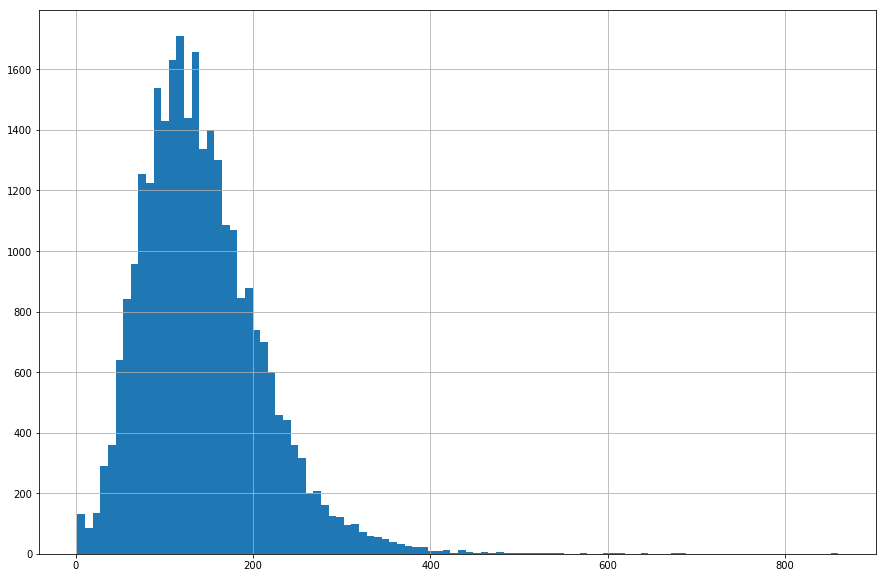

MAX_SEQUENCE_LENGTH is:
860
NB_WORDS is:
4037069


In [4]:
'''
ANN1 = 'lstm'
ANN2 = 'gru'
#run.eda2(df)
test = word_embeddings(input_data, output_data,ANN1,2,1)
test1 = word_embeddings(input_data, output_data,ANN2,2,1)
we_evaluation(test[0],test[1],test1[0],test1[1],ANN1,ANN2,test[2],test1[2])
'''
eda2(df)

In [ ]:
tk = Tokenizer(num_words=NB_WORDS,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=" ")
tk.fit_on_texts(input_data)
'''
trained_seq = tk.texts_to_sequences(train_data)
test_seq = tk.texts_to_sequences(test_data)
'''
word_index = tk.word_index


Train set has total 19846 entries with 54.29% 0, 45.71% 1
Test set has total 8506 entries with 54.21% 0, 45.79% 1
count    28352.000000
mean        23.270316
std         11.727775
min          1.000000
25%         15.000000
50%         21.000000
75%         30.000000
max        134.000000
Name: freetext, dtype: float64
860
(19846, 134)
(8506, 134)
Instructions for updating:
Colocations handled automatically by placer.
300
Timestamp: 2019-05-30 15:20:01
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 134, 300)          2850300   
_________________________________________________________________
lstm_1 (LSTM)                (None, 117)               195624    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 236       
Total params: 3,046,160
Trainable params: 195,860
Non-trainable params: 2,850,300

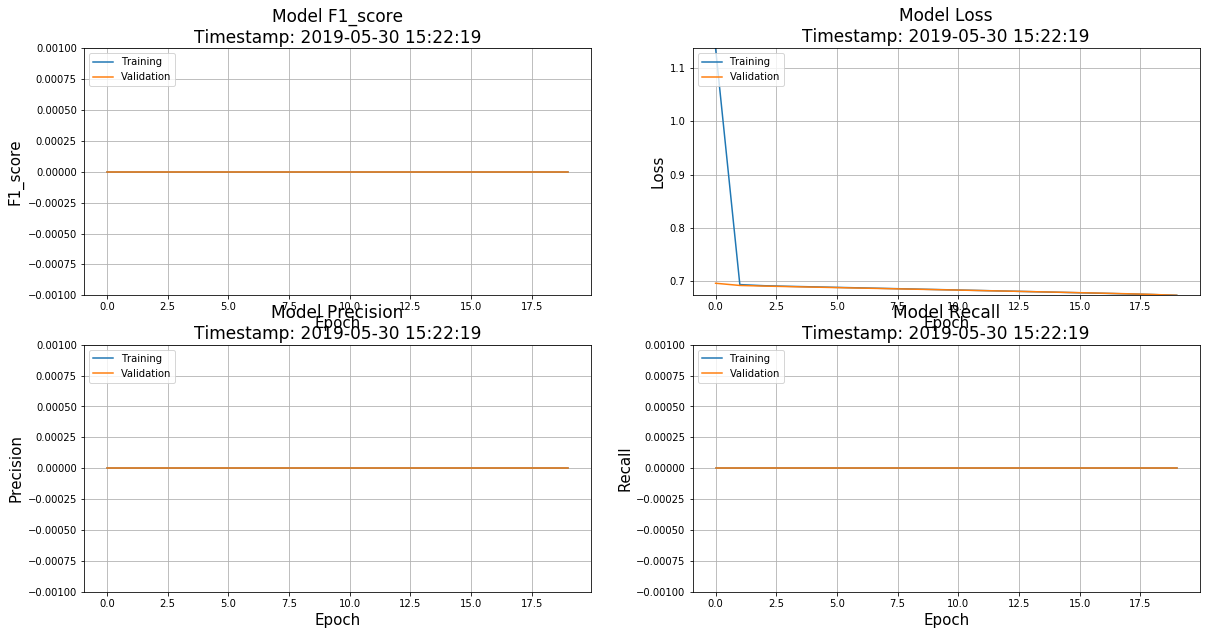


Elapsed Time: 00:02:19
Completed Model Trainning Timestamp: 2019-05-30 15:22:20
Train set has total 19846 entries with 54.29% 0, 45.71% 1
Test set has total 8506 entries with 54.21% 0, 45.79% 1
count    28352.000000
mean        23.270316
std         11.727775
min          1.000000
25%         15.000000
50%         21.000000
75%         30.000000
max        134.000000
Name: freetext, dtype: float64
860
(19846, 134)
(8506, 134)
300
Timestamp: 2019-05-30 15:22:23
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 134, 300)          2850300   
_________________________________________________________________
gru_1 (GRU)                  (None, 117)               146718    
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 236       
Total params: 2,997,254
Trainable params: 146,954
Non-trainable params: 

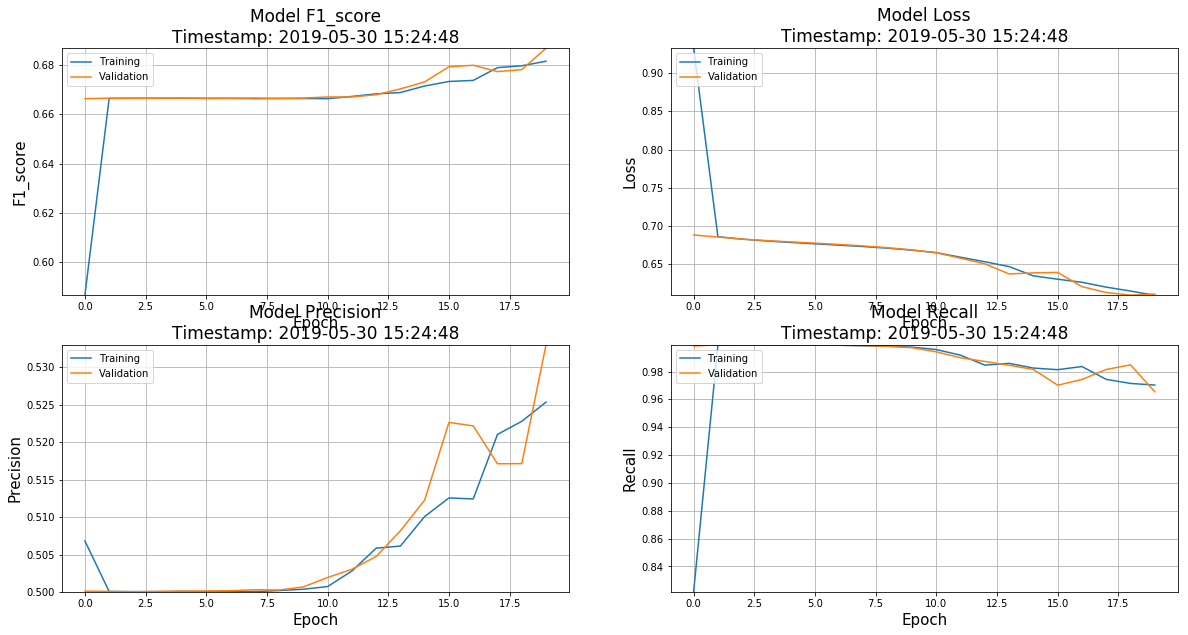


Elapsed Time: 00:02:25
Completed Model Trainning Timestamp: 2019-05-30 15:24:48


TypeError: we_evaluation() missing 2 required positional arguments: 'datax' and 'datay'

In [5]:
ANN1 = 'lstm'
ANN2 = 'gru'
test = word_embeddings(input_data, output_data,ANN1,2,1)
test1 = word_embeddings(input_data, output_data,ANN2,2,1)
we_evaluation(test[0],test[1],test1[0],test1[1],ANN1,ANN2,test[2],test1[2])